In [1]:
###Modules used
#openweathermapy.core
#pandas
#matplotlib
#numpy
#datetime
#requests
#json

###API's used (API keys used for google as well as openweather)
# "https://maps.googleapis.com/maps/api/geocode/json"
# "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
# "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"
#Instead of openweathermapy API, wrapper is 

#Additional APIs that could be used
#https://maps.googleapis.com/maps/api/place/details/json?
#https://maps.googleapis.com/maps/api/distancematrix/json?

In [2]:
import requests
import json
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openweathermapy.core as owm

from config import api_key
from config import gkey

In [3]:
#Read all the Weather csv files 
main = "Resources/Indoor_Outdoor_Weather - main.csv"
main_df = pd.read_csv(main, encoding="ISO-8859-1")
Atmosphere = "Resources/Indoor_Outdoor_Weather - Atmosphere.csv"
atmosphere_df = pd.read_csv(Atmosphere, encoding="ISO-8859-1")
Drizzle= "Resources/Indoor_Outdoor_Weather - Drizzle.csv"
drizzle_df = pd.read_csv(Drizzle, encoding="ISO-8859-1")
Rain = "Resources/Indoor_Outdoor_Weather - Rain.csv"
rain_df = pd.read_csv(Rain, encoding="ISO-8859-1")
Snow ="Resources/Indoor_Outdoor_Weather - Snow.csv"
snow_df = pd.read_csv(Snow, encoding="ISO-8859-1")

#https://developers.google.com/places/web-service/supported_types
#Read all the activities files
Acty_In = pd.read_excel("Resources/Indoor.xlsx")
Acty_Out = pd.read_excel("Resources/Outdoor.xlsx")
Acty_EveIn = pd.read_excel("Resources/EveIndoor.xlsx")
Acty_EveInOut = pd.read_excel("Resources/EveInOut.xlsx")
Acty_NightIn = pd.read_excel("Resources/NightIndoor.xlsx")
Acty_NightInOut = pd.read_excel("Resources/NightInOut.xlsx")

In [4]:
#Converting the actvity dataframes into list
Acty_Inlist = Acty_In["Indoor"].tolist()
Acty_Outlist = Acty_Out["Outdoor"].tolist()
Acty_EveInlist = Acty_EveIn["EveIndoor"].tolist()
Acty_EveInOutlist = Acty_EveInOut["EveInOut"].tolist()
Acty_NightInlist = Acty_NightIn["NightIndoor"].tolist()
Acty_NightInOutlist = Acty_NightInOut["NightInOut"].tolist()

In [6]:
#Input the target city and state
Target_City = input("Enter city & state in the format 'city,state: ")

Enter city & state in the format 'city,state: Woodbridge, NJ


In [7]:
#Split the input to get the city
City = Target_City.split(",")[0]

#Create settings dictionary for units & appid
settings = {"units": "metric", "appid": api_key}

In [8]:
#Get current weather
current_weather = owm.get_current(City, **settings)

summary = ["name", 'weather', "main", "wind", 'clouds']
data = current_weather(*summary)

currentmain = data[1][0]["main"]
temp = data[2]['temp']
humidity = data[2]['humidity']
windspeed = data[3]["speed"]
currentdesc = data[1][0]['description']

In [9]:
Finalresult = ""
Words_of_advice = " "
 
# loop through main weather types to determine if outdoor or indoor activities
if (currentmain=="Thunderstorms") or (currentmain=="Clouds") or (currentmain=="Clear") or (currentmain=="Mist"):
    if (currentmain=="Thunderstorms"):
        Words_of_advice = "Staysafe!!! "+ currentmain + " in the " + City
        Finalresult="indoor"
        print(f'{Words_of_advice}: Be {Finalresult}')
    else:
        Finalresult="outdoor"
        print(f'Lets evaluate temp, windspeed and humidity further to confirm if we should be {Finalresult}s')
else:
    if currentmain=="Rain":
    #read rain.df to find further details
        for index, desctype in rain_df.iterrows():
            if currentdesc == desctype["Description"]:
                Finalresult=rain_df["Rating"][index]
                print(f'{currentmain}:{currentdesc}: You can be {Finalresult}')
    elif currentmain=="Snow" :
        #read snow.df to find further details
        for index, desctype in snow_df.iterrows():
            if currentdesc == desctype["Description"]:
                Finalresult=desctype["Rating"][index]
                print(f'{currentmain}:{currentdesc}: You can be {Finalresult}')
    elif currentmain=="Drizzle" :
        #read drizzledf to find further details
        for index, desctype in drizzle_df.iterrrows():
            if currentdesc == desctype["Description"]:
                Finalresult=drizzle_df["Rating"][index]
                print(f'{currentmain}:{currentdesc}: You can be {Finalresult}')
    elif currentmain=="Atmosphere" :
        #read atmospheredf to find further details
        for index, desctype in atmosphere_df.iterrows():
            if currentdesc== desctype["Description"]:
                Finalresult=atmosphere_df["Rating"][index]
                print(f'{currentmain}:{currentdesc}: You can be {Finalresult}')
if Finalresult == "outdoor" or " ":
    if  (temp<7 or temp>35):
        Words_of_advice = "Better to be safe inside as it is extreme temperature" + str(temp) + " outside in " + City
        Finalresult="indoor"
        print(f'{Words_of_advice}: Advisable to be {Finalresult}')
    elif(windspeed>38):
        #https://en.wikipedia.org/wiki/Beaufort_scale
        Words_of_advice = "Better to be safe inside as it is windy " + str(windspeed) + " outside in " + City
        Finalresult="indoor"
        print(f'{Words_of_advice}: Advisable to be {Finalresult}')
    elif(humidity>60): 
        Words_of_advice  = "Better to be inside as it is quite humid " + str(humidity) + " outside in " + City
        Finalresult="indoor" 
        print(f'{Words_of_advice}: Advisable to be {Finalresult}')
    else:
        Words_of_advice = "It is safe & pleasant!!! Enjoy outside in the current weather of "+ currentmain +" in "+ City
        Finalresult="outdoor"
        print(f'{Words_of_advice}: Be {Finalresult}s & have fun!!!')

Lets evaluate temp, windspeed and humidity further to confirm if we should be outdoors
Better to be inside as it is quite humid 68 outside in Woodbridge: Advisable to be indoor


In [10]:
now = datetime.datetime.now()
print(now)
At12= now.replace(hour=12, minute=0, second=0, microsecond=0)
At15 = now.replace(hour=15, minute=0, second=0, microsecond=0)
At18 = now.replace(hour=18, minute=0, second=0, microsecond=0)
At21 = now.replace(hour=21, minute=0, second=0, microsecond=0)

2018-07-06 17:28:28.895901


In [11]:
Acty = Finalresult
if (Acty == "outdoor"):
    if(now < At12):
        print(Words_of_advice)
        print("It's morning, plan outdoor activities for the entire day")
        Acty = Acty_Outlist
    elif((now >= At12 and now < At15)):
        print(Words_of_advice)
        print("It's afternoon, plan outdoor activities for the day")
        Acty = Acty_Outlist
    elif((now >= At15 and now < At18)):
        print(Words_of_advice)
        print("It's evening, though you can go outdoor,however, we would suggest indoor activities for the evening as parks,zoos might be closed. We would add stadiums though, as there might be matches and campgrounds if you are adventurous!!!")
        Acty = Acty_EveInOutlist
    elif((now >= At18)):
        print(Words_of_advice)
        print("It's lovely night, though you can go outdoor,however, we would recommend indoor activities for the night,as parks,zoos are closed. We would add stadiums though, as there might be matches and campgrounds if you are adventurous!!!")
        Acty = Acty_NightInOutlist 
elif (Acty == "indoor"):        
    if(now < At12):
        print(Words_of_advice)
        print("It's morning, plan indoor activities for the entire day or stay at home & relax.")
        Acty = Acty_Inlist
    elif((now >= At12 and now < At15)):
        print(Words_of_advice)
        print("It's afternoon, plan indoor activities for the day or stay at home & relax.")
        Acty = Acty_Inlist
    elif((now >= At15 and now < At18)):
        print(Words_of_advice)
        print("It's evening, plan indoor activities for the evening or stay at home & relax.")
        Acty = Acty_EveInlist 
    elif((now >= At18)):
        print(Words_of_advice)
        print("It's night, plan indoor activities for the night or stay at home & relax.")
        Acty = Acty_NightInlist 

Better to be inside as it is quite humid 68 outside in Woodbridge
It's evening, plan indoor activities for the evening or stay at home & relax.


In [12]:
#Google Maps Geocode API
base_url_geocode = "https://maps.googleapis.com/maps/api/geocode/json"

#Creating the params dict with address and key
params_geocode = {"address": Target_City, "key": gkey}

In [13]:
# Run request (Build URL using the base_url & params)
response = requests.get(base_url_geocode, params=params_geocode)

# Convert the response to JSON
city_geo = response.json()

# Extract Lat/Lng
lat = city_geo["results"][0]["geometry"]["location"]["lat"]
lng = city_geo["results"][0]["geometry"]["location"]["lng"]

# Print results
print("%s: %s, %s" % (Target_City, lat, lng))

#Converting the lat & lng to string
lat = str(lat)
lng = str(lng)

Woodbridge, NJ: 40.5575986, -74.2846022


In [14]:
#Google maps nearby places search API
base_url_nearby = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
#Google maps places API
base_url_findplace = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"

In [15]:
#Find the names and addresses of nearbyplaces in given city,state entered by the
#user.
type_of_place = []
place_names = []
addresses = []
rating = []
openorclose = []
for i in range(len(Acty)):
    
    target_type = Acty[i]
    radius = 50000

# Build URL using the Google Maps API and other fields
    target_url_nearby = base_url_nearby+"key="+gkey+"&location="+lat+","+lng+"&radius="+str(radius)+"&type="+target_type
    #target_url_nearby = base_url_nearby+"key="+gkey+"&location="+lat+","+lng+"&rankby=distance"+"&type="+target_type

# Run request
    response = requests.get(target_url_nearby)
    city_placestogo = response.json()
   
    if city_placestogo["status"] == "ZERO_RESULTS":
        print(f'{Acty[i].upper()} : No {Acty[i]} near your place of choice.')
        type_of_place.append(target_type)
        place_names.append("Not Available ")
        addresses.append("Not Available ")
        rating.append("Not Available ")
        openorclose.append("Not Available ")
        print("\n")
    else:
        print(f'{Acty[i].upper()} : Bingo!!! We have found good {Acty[i]}s near your place of choice.')
        count = 0
        for item in city_placestogo["results"]:
            myplace = item["name"]
            myplace = myplace.replace(" ", "%20")
            target_url_findplace = base_url_findplace+"key="+gkey+"&input="+myplace+"&inputtype=textquery"+"&fields=formatted_address,name,rating,opening_hours"
            response = requests.get(target_url_findplace)
            data = response.json()
            type_of_place.append(target_type)
            try:
                place_names.append(data["candidates"][0]["name"])
            except:
                place_names.append(item["name"])
            try:    
                addresses.append(data["candidates"][0]["formatted_address"])
            except:
                addresses.append(item["vicinity"])
            try:    
                rating.append(data["candidates"][0]["rating"])
            except:   
                rating.append(np.nan)
            try:  
                if(data["candidates"][0]["opening_hours"]["open_now"]):
                    openorclose_status = "Open"
                else:
                    openorclose_status = "Closed"
                openorclose.append(openorclose_status)
            except:
                openorclose.append("Check the opening hours on the website")
            count = count + 1
        print(f'Total {count} {Acty[i]}s are found near {City}')
        print("\n")    

AQUARIUM : Bingo!!! We have found good aquariums near your place of choice.
Total 20 aquariums are found near Woodbridge


ART_GALLERY : Bingo!!! We have found good art_gallerys near your place of choice.
Total 20 art_gallerys are found near Woodbridge


BAKERY : Bingo!!! We have found good bakerys near your place of choice.
Total 20 bakerys are found near Woodbridge


BAR : Bingo!!! We have found good bars near your place of choice.
Total 20 bars are found near Woodbridge


BOOK_STORE : Bingo!!! We have found good book_stores near your place of choice.
Total 20 book_stores are found near Woodbridge


BOWLING_ALLEY : Bingo!!! We have found good bowling_alleys near your place of choice.
Total 20 bowling_alleys are found near Woodbridge


CAFE : Bingo!!! We have found good cafes near your place of choice.
Total 20 cafes are found near Woodbridge


CASINO : Bingo!!! We have found good casinos near your place of choice.
Total 20 casinos are found near Woodbridge


FLORIST : Bingo!!! We hav

In [46]:
Df = pd.DataFrame({"Type":type_of_place,"Place":place_names,"Address":addresses, 
                   "Rating":rating,
                  "OpenorClose":openorclose})
Df.fillna(0, inplace=True)
Df_sorted = Df.sort_values(by=["Type"])
Df_sorted[["Type","Place","Address","Rating","OpenorClose"]]

,Type,Place,Address,Rating,OpenorClose
0,aquarium,New York Aquarium,"602 Surf Ave, Brooklyn, NY 11224, USA",3.9,Open
19,aquarium,Aquariums To Go,Long Branch,0.0,Check the opening hours on the website
18,aquarium,Aquapro Aquariums,"123 Lenox Street, Newark",0.0,Check the opening hours on the website
17,aquarium,The Ancient Mariners,"209 Lake Avenue, Trenton",0.0,Check the opening hours on the website
16,aquarium,Aqua Vim Corporation,"54-08 46th St, Maspeth, NY 11378, USA",4.5,Open
15,aquarium,Aquarium Architecture,"521 5th Avenue, New York",0.0,Check the opening hours on the website
13,aquarium,Reef Junkie LLC,"443 Joralemon Street #3, Belleville",0.0,Check the opening hours on the website
12,aquarium,David's Aquariums,"2 Colony Dr E, West Orange, NJ 07052, USA",0.0,Check the opening hours on the website
11,aquarium,David's Aquariums,"2 Colony Dr E, West Orange, NJ 07052, USA",0.0,Check the opening hours on the website
10,aquarium,BluReef Aquarium,"2198 Flatbush Ave, Brooklyn, NY 11234, USA",4.5,Closed


AQUARIUM


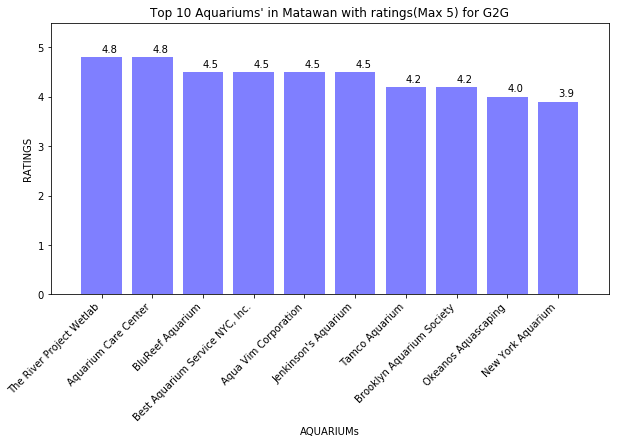

ART_GALLERY


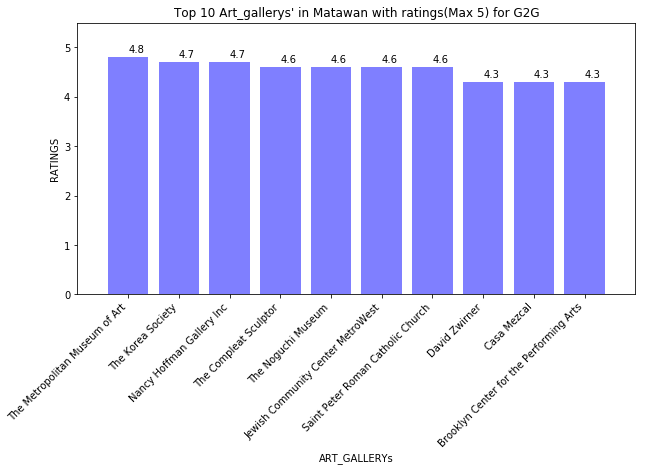

BAKERY


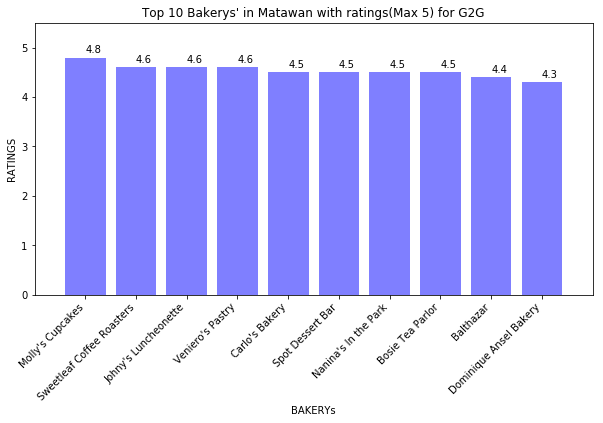

BAR


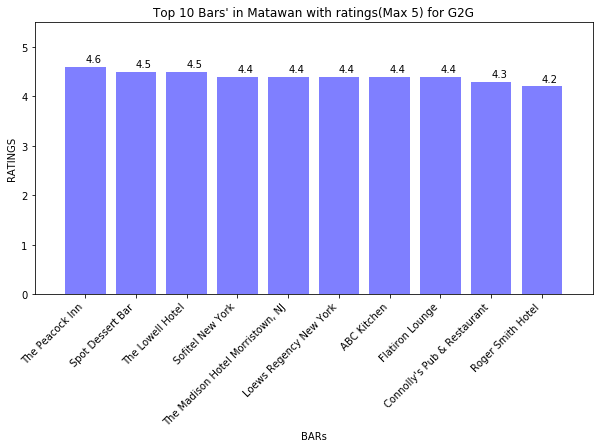

BOOK_STORE


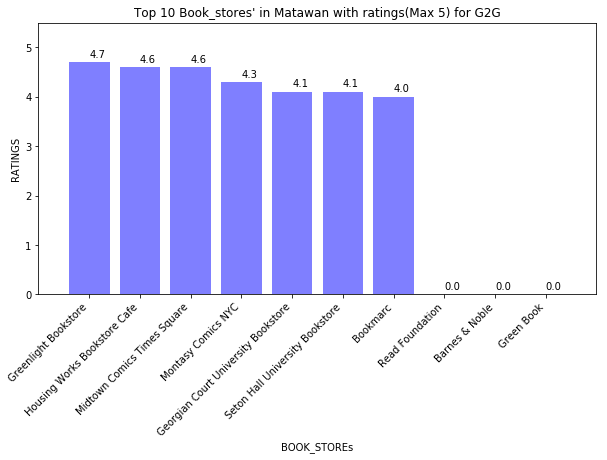

BOWLING_ALLEY


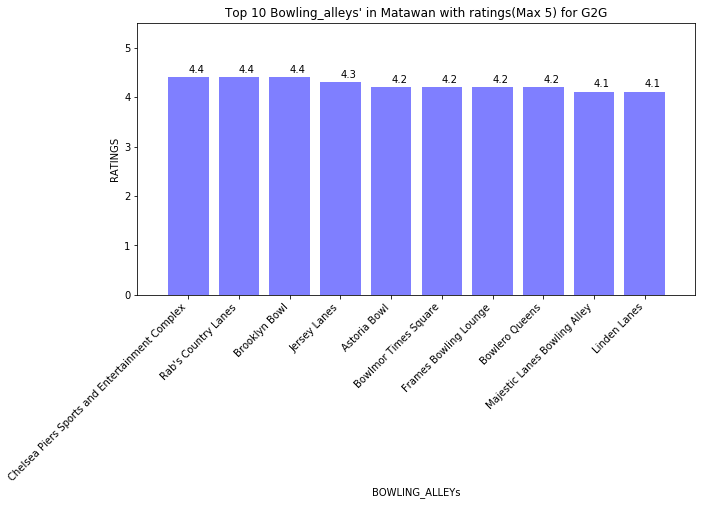

CAFE


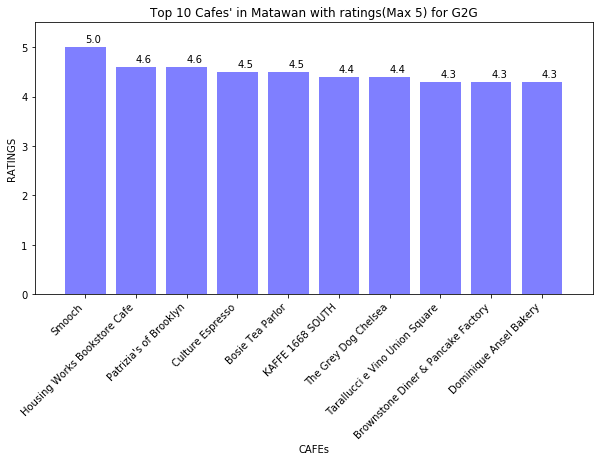

CASINO


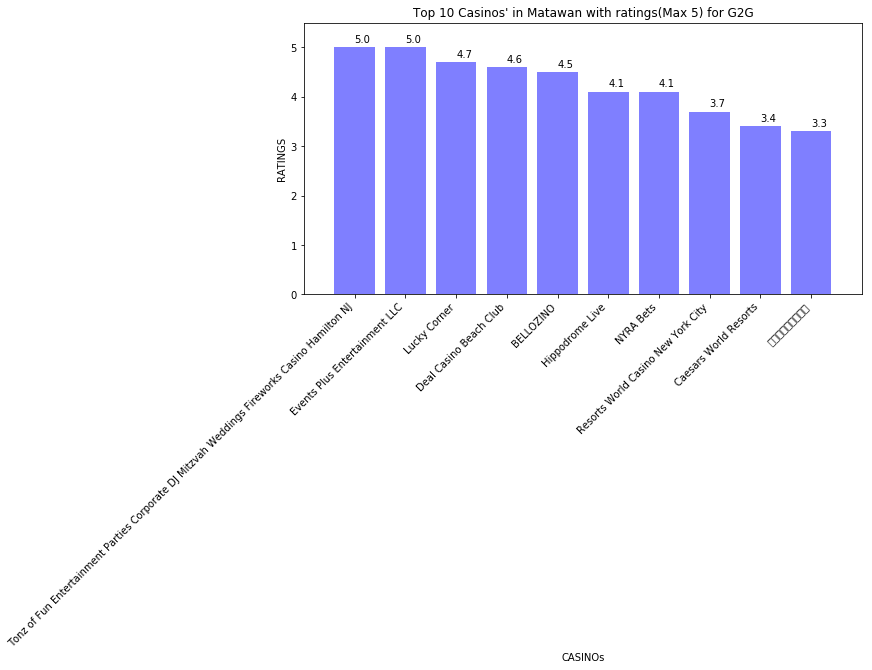

FLORIST


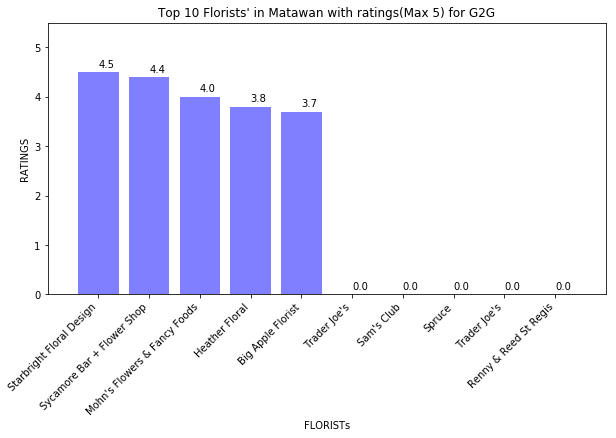

GYM


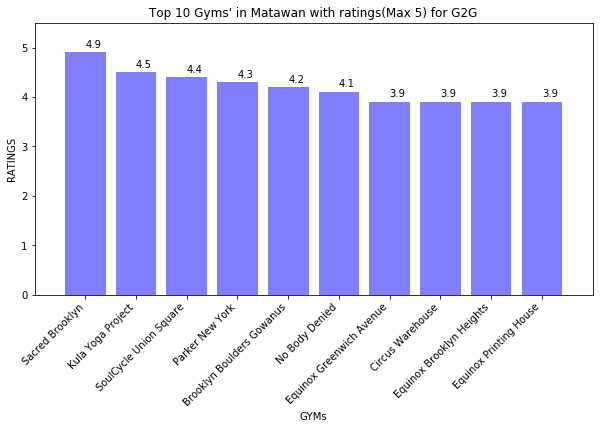

LIBRARY


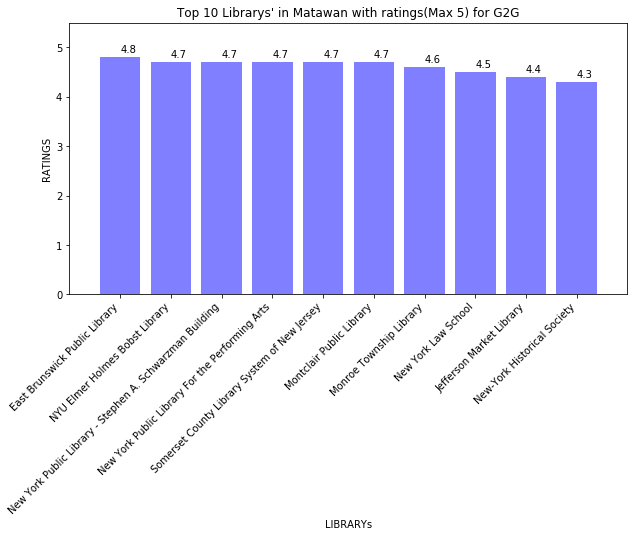

LODGING


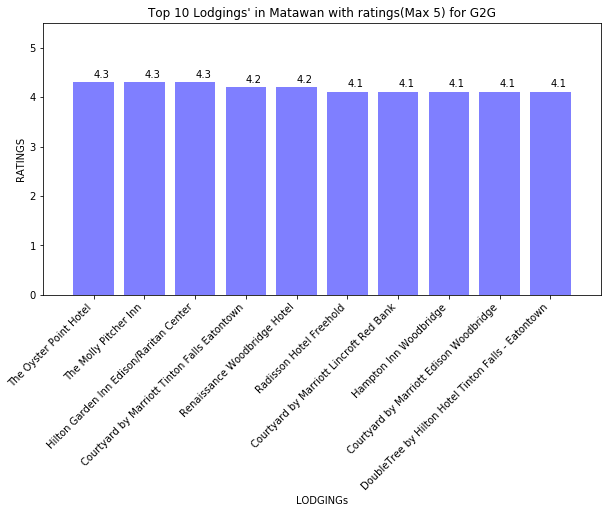

MOVIE_RENTAL


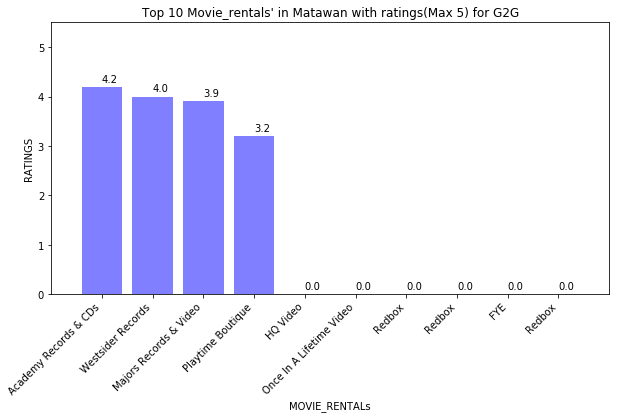

MOVIE_THEATER


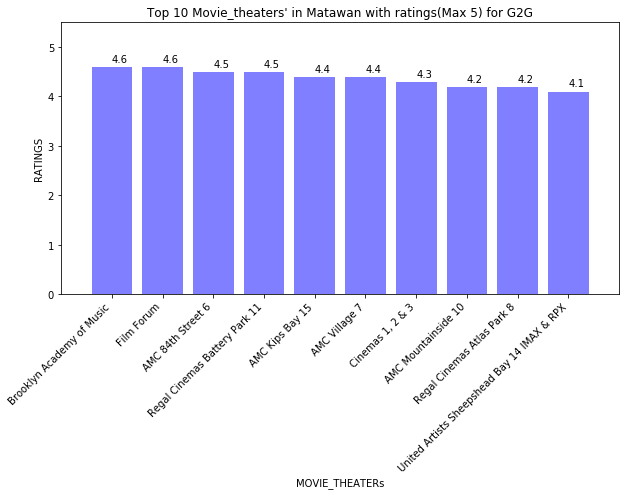

PET_STORE


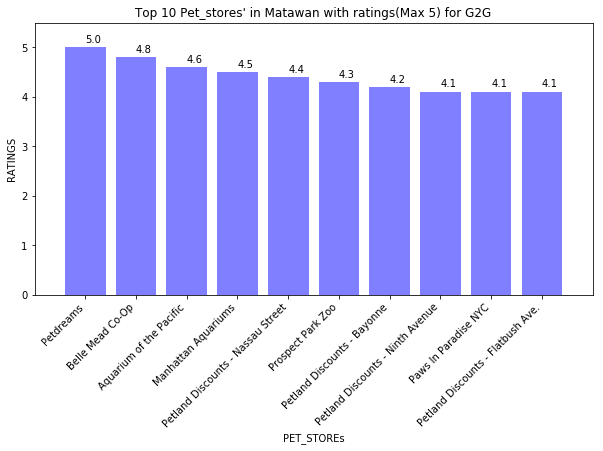

RESTAURANT


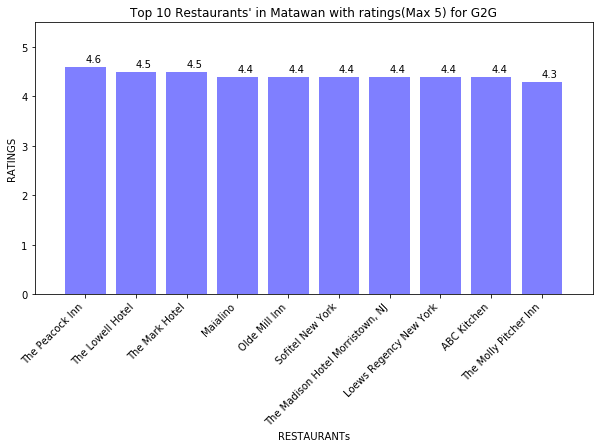

SHOPPING_MALL


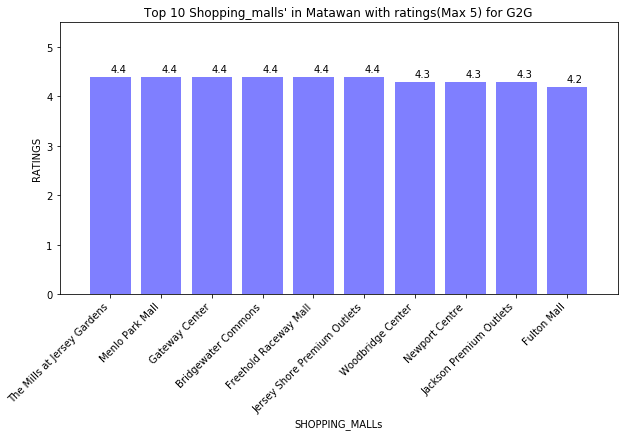

SPA


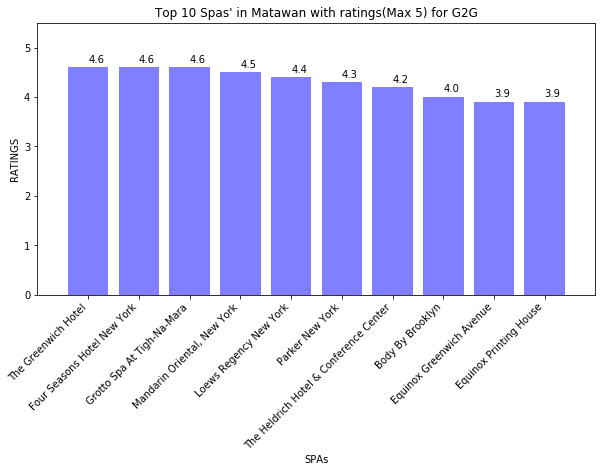

In [48]:
for acty in Acty:
    print(acty.upper())
    Df_A = Df[Df["Type"] == acty]
    Df_A = Df_A.sort_values(by=["Rating"],ascending=False)
    DF_A = Df_A[Df_A["OpenorClose"]=="open"]
    Df_A = Df_A[:10]
    x_axis = np.arange(len(Df_A["Place"]))
    plt.figure(figsize = (10,5))
    plt.bar(x_axis, Df_A["Rating"],align="center",color="blue",alpha = 0.5)
    plt.xlim(-1,10)
    plt.ylim(0,5.5)
    plt.xlabel(f'{acty.upper()}s')
    plt.ylabel("Ratings".upper())
    plt.title(f"Top 10 {acty.capitalize()}s' in {City} with ratings(Max 5) for G2G")
    plt.xticks(x_axis, Df_A["Place"],rotation=45,horizontalalignment="right")
    for a,b in zip(x_axis, Df_A["Rating"]):
        plt.text(a, b+.1, str(b))    
    #plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0,rect=(0, 0, 1, 1))
    plt.savefig(f'Results/Top_{acty.capitalize()}s_of_{City}_with_Ratings_G2G_Open.jpg',bbox_inches="tight")
    plt.show()    